# Exploratory Data Analysis (EDA)

This notebook serves as a placeholder for exploratory data analysis
as part of the Linear Regression Architecture ExtraCredit.

At this stage, the focus is on project structure and reproducibility.
Full data ingestion and visualization will be implemented in a future sprint.


## Planned EDA Steps

Load dataset from `data/raw/`
Inspect schema and missing values
Generate summary statistics
Visualize feature vs target relationships


### CSV Files
California Housing Dataset (CSV-style)

- Source: scikit-learn `fetch_california_housing`
- Type: Tabular numeric dataset
- Target: Median house value
- Feature used: Median income

In [3]:
# Import the built-in California Housing dataset loader from scikit-learn
# This dataset is commonly used for regression examples and tutorials
from sklearn.datasets import fetch_california_housing

# Import pandas for tabular data manipulation
import pandas as pd

# Fetch the California Housing dataset
# as_frame=True returns the data as a pandas DataFrame instead of NumPy arrays
california = fetch_california_housing(as_frame=True)

# Extract the main DataFrame containing features and target
# The target variable (median house value) is included as the last column
df = california.frame

# Generate descriptive statistics for all numerical columns
# This includes count, mean, standard deviation, min/max, and quartiles
# It helps us understand the overall scale, distribution, and potential outliers
df.describe()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


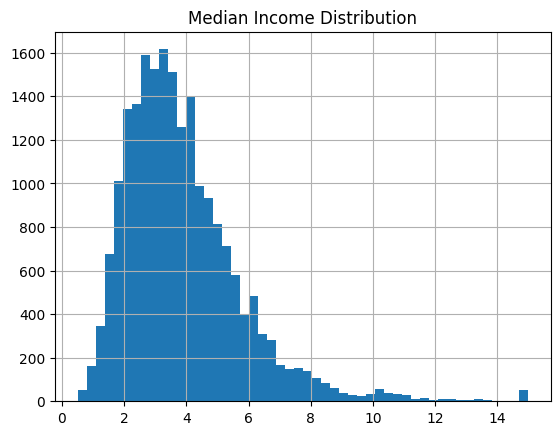

In [4]:
# Import matplotlib for basic data visualization
import matplotlib.pyplot as plt

# Plot a histogram of the Median Income (MedInc) feature
# This visualization helps us understand the distribution,
# skewness, and range of the income variable
df['MedInc'].hist(bins=50)

# Add a title to clearly describe what the plot represents
plt.title("Median Income Distribution")

# Display the plot
plt.show()


In [5]:
# Save the California Housing dataset to a CSV file
# This simulates a real-world CSV data source
# and aligns with the project structure requirements

output_path = "../data/raw/california_housing.csv"
df.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")


Dataset saved to ../data/raw/california_housing.csv


### Web Services (APIs)
This section demonstrates loading data from a web API.
For the workshop, this serves as a placeholder for housing-related APIs (e.g., municipal or real estate APIs).

In [7]:
import requests
import pandas as pd

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_list"
response = requests.get(url)
data = response.json()

df_api = pd.DataFrame(data["result"], columns=["dataset_name"])
df_api.head()


,dataset_name
0,10-year-cycling-network-plan-on-street-2016
1,10-year-cycling-network-plan-trails-2016
2,2013-street-needs-assessment-results
3,2018-street-needs-assessment-results
4,2021-street-needs-assessment-results


## Relational Databases
Loading Data from a Relational Database (SQLite)

In this section demonstrate how tabular housing data can be accessed from a
**relational database** instead of a flat file or an API.

For portability and simplicity, use **SQLite**, a lightweight, file-based
relational database that does not require a separate server. SQLite is suitable
for local experimentation and is explicitly allowed for this workshop.

### Workflow Overview
1. Create a temporary SQLite database.
2. Store a subset of the housing dataset into a database table.
3. Query the data using SQL.
4. Load the query results into a Pandas DataFrame for analysis and visualization.

This step illustrates how the same dataset can be sourced from different systems
(CSV files, APIs, and databases) while supporting reproducible data analysis.


In [10]:
import sqlite3
import pandas as pd

# Use the DataFrame loaded from CSV (California housing)
# Here we reuse the same df created earlier
df_csv = df.copy()

# Create an in-memory SQLite database (portable and acceptable)
conn = sqlite3.connect(":memory:")

# Write a subset of the data into a SQL table
df_csv.head(200).to_sql(
    name="housing",
    con=conn,
    index=False,
    if_exists="replace"
)

# Query the database using SQL
df_db = pd.read_sql(
    "SELECT MedInc, MedHouseVal FROM housing",
    conn
)

df_db.head()


,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


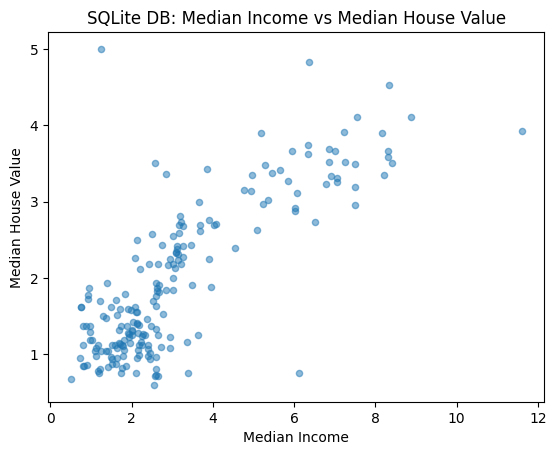

In [12]:
import matplotlib.pyplot as plt

# This visualization uses data retrieved from a relational database (SQLite)
# to explore the relationship between income and housing prices.
#
# The data was:
# 1. Loaded from a CSV file
# 2. Inserted into a SQLite table
# 3. Queried using SQL
# 4. Converted back into a pandas DataFrame (df_db)
#
# This step demonstrates end-to-end data flow from database to analysis.

df_db.plot.scatter(
    x="MedInc",
    y="MedHouseVal",
    alpha=0.5  # Transparency helps visualize point density
)

# Add descriptive title and axis labels
plt.title("SQLite DB: Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

# Display the plot
plt.show()
